# Project 3 - Statistics Training

## Today's Agenda, In this notebook we will cover:

- Learn how to Bin Data
- Learn Cumulative Probability
- Learn basic statistics (mean, standard deviation, kurtosis, skewness)
- Practice fitting data
- Learn K-S test
- Learn Chi-Squared statistics and Minimization
- Learn how to make heatmaps
- Learn basics of Monte Carlo Markov Chains
- Learn Bootstrap Sampling


In [1]:
# Let's import some modules that we'll use today:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats

# One of the data sets we'll work with comes from the ESA Hipparcos satellite. 

## ESA's Hipparcos space astrometry mission was a pioneering European project which pinpointed the positions of more than one hundred thousand stars with high precision


Let's read in our data set, called 'hipparchos_subsample.dat', and create a histogram of our measured distances for stars within 1,000 parsecs

9998
9998


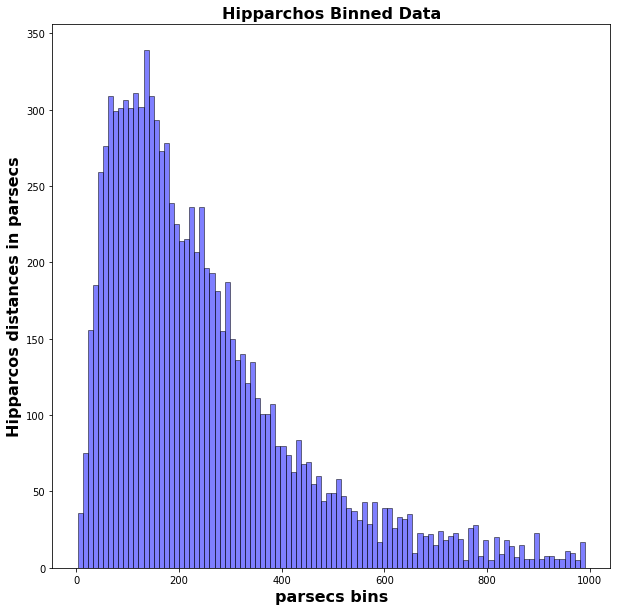

In [2]:
data = np.loadtxt('hipparchos_subsample.dat')
print(len(data))

# some fake data, we'll use
data_range = np.arange(0,len(data))
print(len(data_range))

fs = 16



plt.figure(figsize=(10,10))

# here, we're creating a histogram with 100 bins of equal widths
plt.hist(data, bins=100,alpha=0.5, color='blue',histtype='bar', ec='black')

plt.title('Hipparchos Binned Data',fontsize=fs,weight='bold')
plt.xlabel('parsecs bins',fontsize=fs,weight='bold')
plt.ylabel('Hipparcos distances in parsecs',fontsize=fs,weight='bold')
plt.show()

## We can see that on the vertical axis, we have counts of distance measurements per bin of parsecs.

## If we wanted to convert this vertical axis to better show the proportion of the data in each bin, we can normalize our histogram by dividing by the number of  distance measurements in our data set

100
100
hipparchos counts: [ 25  61 149 179 248 278 302 300 306 307 312 313 303 337 328 278 283 290
 243 230 214 215 243 210 226 215 190 176 174 173 151 131 134 136 141 112
  94  95 109  77  91  64  75  66  69  77  65  41  44  54  53  61  38  39
  47  33  31  36  36  34  33  32  28  33  41  14  19  20  31  15  24  18
  21  14  19  14  26   8  28   1  22  20   9   9  23   7  15   6   6  10
  19   8   8   6   6  11  10   5   9   8]
bins: [   0.   10.   20.   30.   40.   50.   60.   70.   80.   90.  100.  110.
  120.  130.  140.  150.  160.  170.  180.  190.  200.  210.  220.  230.
  240.  250.  260.  270.  280.  290.  300.  310.  320.  330.  340.  350.
  360.  370.  380.  390.  400.  410.  420.  430.  440.  450.  460.  470.
  480.  490.  500.  510.  520.  530.  540.  550.  560.  570.  580.  590.
  600.  610.  620.  630.  640.  650.  660.  670.  680.  690.  700.  710.
  720.  730.  740.  750.  760.  770.  780.  790.  800.  810.  820.  830.
  840.  850.  860.  870.  880.  890.  900.  910. 

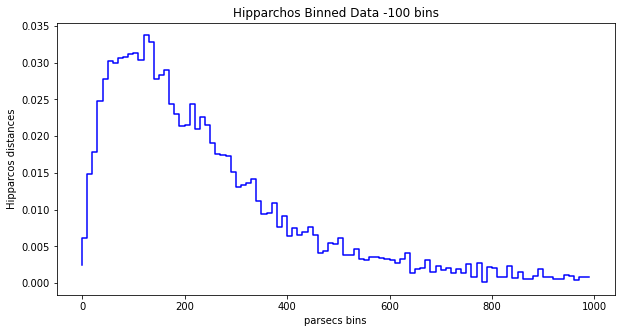

In [7]:
#Manually creating Bins
bins0 = np.linspace(0,1000,101) #start, stop, stepsize
counts0 = np.histogram(data, bins0)

bins = bins0[0:-1] #removes last element of bins


datalength = len(data)*1.0
counts = counts0[0]/datalength
print (len(counts))
print (len(bins))

print ("hipparchos counts:", counts0[0])
print ("bins:", bins0)
plt.figure(figsize=(10,5))
plt.step(bins, counts, color='blue')
plt.title('Hipparchos Binned Data -100 bins')
plt.xlabel('parsecs bins'); plt.ylabel('Hipparcos distances')

plt.show()


In [5]:
# if we try with a smaller number of bins (let's try 50), we'll have larger bin widths as a result

50
50


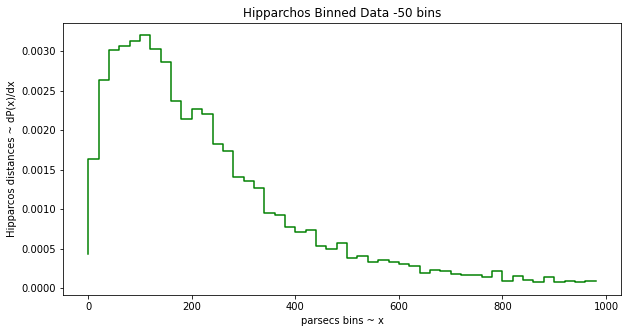

In [8]:
#Example: 50 bins vs 100 bins
bins50 = np.linspace(0,1000,51)
binsfifty = bins50[0:-1] 
counts50 = np.histogram(data, bins50)
countsfifty = counts50[0]/(len(data)*1.0)/(binwidth)

print (len(binsfifty))
print( len(countsfifty))
plt.figure(figsize=(10,5))
plt.step(binsfifty, countsfifty, color='green')
plt.title('Hipparchos Binned Data -50 bins')
plt.xlabel('parsecs bins ~ x'); plt.ylabel('Hipparcos distances ~ dP(x)/dx')
plt.show()

# the way we can calculate our bin with is by taking the range(max-min) and dividing by the number of bins

In [11]:
bin_width100 = (np.max(bins)-np.min(bins))/len(bins)
bin_width50 = (np.max(binsfifty)-np.min(binsfifty))/len(binsfifty)
print('bin widths:',bin_width50,bin_width100)


bin widths: 19.6 9.9


# If we wanted to calculate the Cumulative Sum (a "running total") of our measured distances, we can do so with np.cumsum:

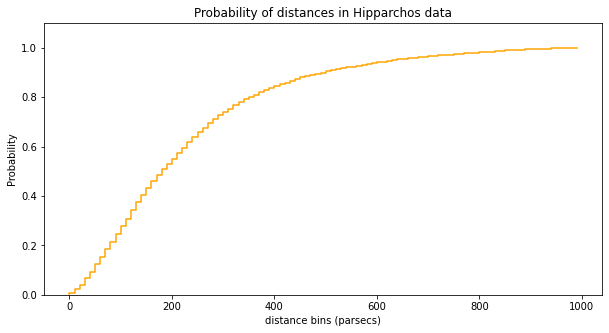

In [24]:
#Cumulative Probability:
CumSum = np.cumsum(counts)

bins1 = bins0[0:-1]

plt.figure(figsize=(10,5))
plt.step(bins1, CumSum, color='Orange')
plt.title('Probability of distances in Hipparchos data')
plt.xlabel('distance bins (parsecs)'); plt.ylabel('Probability')
plt.ylim(0,1.1)
plt.show()

# If we wanted to calculate Cumulative Distribution Function (CDF),  which is a function that calculated the probability that a random variable Y is less than or equal to X.

# $F_Y (x)$ = $Probability [Y <= x]$ = $\int^{x}_{-\infty} f_Y (u) du$


# This can easily be calculated by taking our histogram counts and dividing by the sum to get a "probability density function". To then get our cumulative distribution function, we take the cumulative sum of our probability density function. This is how we'll do it:

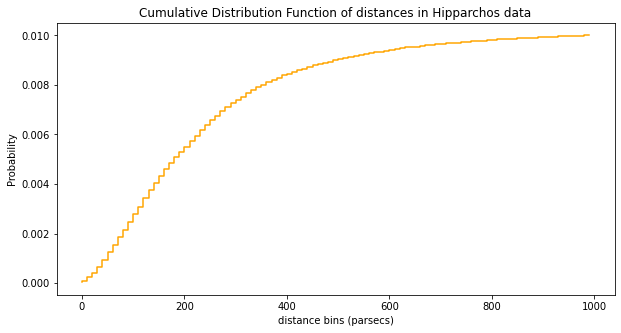

In [14]:
pdf = counts/ len(counts)

cdf = np.cumsum(pdf)

plt.figure(figsize=(10,5))
plt.step(bins, cdf, color='Orange')
plt.title('Cumulative Distribution Function of distances in Hipparchos data')
plt.xlabel('distance bins (parsecs)'); plt.ylabel('Probability')
# plt.ylim(0,1.1)
plt.show()

# Note the main difference between these two, are the vertical axes. A cumulative sum goes from 0 to 1 where 0 means zero numbers in a bin, and 1 means every number for all bins. 

# In the case of our CDF, it has a vertical scale from 0 to 1 because it is a probability (0 for meaning impossible, 1 for meaning 100% possible)

# Next, let's go over some basic statistics using our hipparcos data. We'll do them the easy way and a manual way:

In [15]:
# Mean
N = len(data)
manual_mean = np.sum(data) / N # manual way
easy_mean = np.nanmean(data)
print('mean:',manual_mean,easy_mean)
print(' ')

# Median:
d  = np.sort(data) #temporary variable to avoid sorting our original data variable
if N % 2 == 0:
    median1 = d[N//2]
    median2 = d[N//2 - 1]
    manual_median = (median1 + median2)/2
else:
    manual_median = d[N//2]
    
easy_median  = np.nanmedian(data)
print('median:', manual_median,easy_median)
print(' ')


# Standard Deviation

manual_var  = sum( (x-manual_mean)**2 for x in data ) / N  # variance
manual_std  = manual_var**0.5  # standard deviation

easy_std = np.nanstd(data)
print('Standard Deviation:',manual_std,easy_std)
print(' ')

# Skewness
# is a measure of the asymmetry of a distribution. 
# A distribution is asymmetrical when its left and right side are not mirror images. 
# A distribution can have right (or positive), left (or negative), or zero skewness.
manual_Skewness = np.sum((data-manual_mean)**3)/(N*(manual_std**3))
easy_Skewness = stats.skew(data)
print('Skewness:',manual_Skewness,easy_Skewness)
print(' ')


# Kurtosis
# is a measure of how shallow a distribution (or how narrow its tails) are.
# a low kurtosis means, the tails on both sides of a distrubution are narrow.
# a high kurtosis means, the tails on both sides of a distrubution are wide.
manual_kurtosis = np.sum((data-manual_mean)**4)/((N)*(manual_std**4))-3 #Fisher's Kurtosis method
easy_kurtosis = stats.kurtosis(data)
print('Kurtosis: ',manual_kurtosis,easy_kurtosis)

mean: 247.77535607121422 247.77535607121422
 
median: 196.5 196.5
 
Standard Deviation: 188.69960245271307 188.69960245271267
 
Skewness: 1.4174458318976728 1.4174458318976815
 
Kurtosis:  1.9441497834187453 1.944149783418788


In [16]:
# calculating percentiles:

# for the manual way, we'll use a function:

def my_percentile(data, percentile):
    import math
    n = len(data)
    p = n * percentile / 100
    if p.is_integer():
        return sorted(data)[int(p)]
    else:
        return sorted(data)[int(math.ceil(p)) - 1]

    
p = 0.16
manual_percentile=my_percentile(data, percentile=p)
easy_percentile = np.percentile(data,p)

print(p*100,'th percentile',manual_percentile, easy_percentile) # these are close-ish


p = 0.84
manual_percentile=my_percentile(data, percentile=p)
easy_percentile = np.percentile(data,p)

print(p*100,'th percentile',manual_percentile, easy_percentile) # these are close-ish

16.0 th percentile 8.4 8.4716544
84.0 th percentile 19.72 19.934456


# Fitting Data

## For our histogram of hipparcos data, we're going to fit the data assuming it is like a gaussian function:

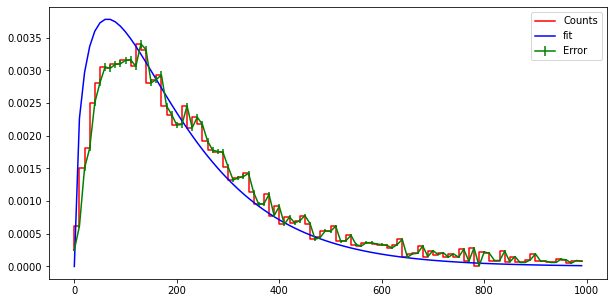

Binned Mean
247.77535607121422
Binned Sigma
154.6293990469359


In [28]:
#Manually creating Bins
bins0 = np.linspace(0,1000,101) #start, stop, stepsize
bins1 = bins0[0:-1]

# normalizing data
counts = counts0[0]/len(data)

#hand tweaking, this is a better fit when scaling the exponential with 150
# y = np.sqrt(bins_onehundred)*np.exp((-1.0*bins_onehundred/150))

def gaussian(x, mu, sig,y):
    return np.sqrt(x) * np.exp( -x/x[np.argmax(y)]  )

y =gaussian(bins1,np.nanmean(bins1),np.nanstd(bins1), counts)


#print len(y); print len(bins1); 
dmax = np.max(bins1); dmin =np.min(bins1); binwidth = float((dmax-dmin)/100)
normalized_y = y/(np.sum(y)*binwidth)
counts_one_hundred = counts/binwidth


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)    # The big subplot
ax.step(bins1, counts_one_hundred, color = 'red', label='Counts')
ax.plot(bins1, normalized_y, color = 'blue', label = 'fit')

errorbars = np.sqrt(counts_one_hundred)/(len(counts_one_hundred)*binwidth) 
ax.errorbar(bins1, counts_one_hundred, yerr=errorbars, color = 'green', label='Error' )
ax.legend(loc='best')
plt.show()


#Binned Mean
print('Binned Mean'); print( np.mean(data))
BinMean= np.sum(normalized_y*bins1*binwidth)
n = len(data)

print('Binned Sigma'); sigma = np.sqrt(np.sum(((bins1-BinMean)**2)*(normalized_y*binwidth))) ; print (sigma)

# Next, let's estimate the binned cumulative probability for our data:

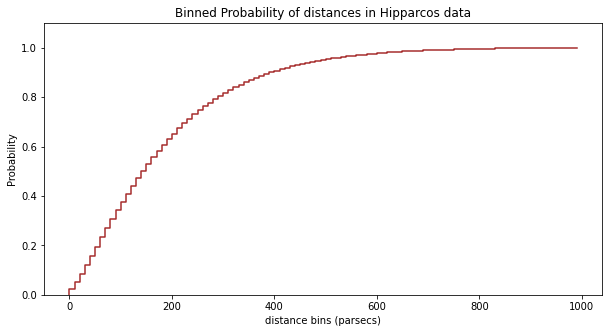

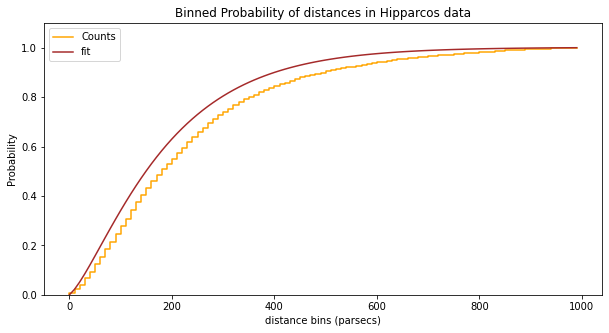

In [25]:
pdf = counts / len(counts)
cdf = np.cumsum(pdf)

binned_pdf = normalized_y*binwidth
binned_CumSum = np.cumsum(binned_pdf)

fig = plt.figure(figsize=(10,5))
plt.step(bins1, binned_CumSum, color='brown')
plt.title('Binned Probability of distances in Hipparcos data')
plt.xlabel('distance bins (parsecs)'); plt.ylabel('Probability')
plt.ylim(0,1.1)
plt.show()

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)    # The big subplot
ax.step(bins1, CumSum, color = 'orange', label='Counts')
ax.plot(bins1, binned_CumSum, color = 'brown', label = 'fit')
plt.title('Binned Probability of distances in Hipparcos data')
plt.xlabel('distance bins (parsecs)'); plt.ylabel('Probability')
plt.legend(loc='best')
plt.ylim(0,1.1)
plt.show()

# So, these aren't perfect fits since our Gaussian is slightly off.

# To estimate the "goodness" of a fit, we can use the $\chi ^2$ test, where

# $\chi ^2$ = $\sum \frac{(y - \mu_y)^2}{\sigma_y}$

<ipython-input-33-5126ec9af54d>:13: RuntimeWarning: divide by zero encountered in divide
  Y = np.sqrt(bins1)*np.exp((-1.0*bins1/ds[ii]))
<ipython-input-33-5126ec9af54d>:13: RuntimeWarning: invalid value encountered in divide
  Y = np.sqrt(bins1)*np.exp((-1.0*bins1/ds[ii]))


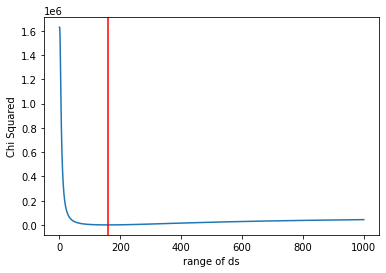

minimum chi squared value: 581.5026364556876
best ds for fit: 160.4641856742697


In [33]:
bins0 = np.linspace(0,1000,101)
bins1 = bins0[0:-1] #100 bins from 0 to 1000
counts0 = np.histogram(data, bins0)
datalength = len(data)*1.0
counts = counts0[0]/datalength
counts_one_hundred = counts/binwidth


ds = np.linspace(0,1000,2500)

ChiSq = []
for ii in range(0,len(ds)):
    Y = np.sqrt(bins1)*np.exp((-1.0*bins1/ds[ii]))
    Normalized_Y = Y/(np.sum(Y)*binwidth)
    ChiSq.append(np.sum(((counts_one_hundred - Normalized_Y)/sigma)**2))

ChiSq = np.array(ChiSq)
ChiSq = ChiSq[~np.isnan(ChiSq)] #removing nan value from first element


ds = ds[0:-1] #to match dimensions as ChiSq 
#print len(ChiSq), len(ds)

plt.plot(ds,ChiSq)

plt.axvline(ds[np.argmin(ChiSq)],color='red')

plt.xlabel('range of ds')
plt.ylabel('Chi Squared')
# plt.xlim(50,300)
plt.show()

print ("minimum chi squared value:",np.min(ChiSq))
print ("best ds for fit:",ds[np.argmin(ChiSq)])

<ipython-input-35-d5ebd9226127>:9: RuntimeWarning: divide by zero encountered in divide
  Y = np.sqrt(bins1)*np.exp((-1.0*bins1/ds[ii]))
<ipython-input-35-d5ebd9226127>:9: RuntimeWarning: invalid value encountered in divide
  Y = np.sqrt(bins1)*np.exp((-1.0*bins1/ds[ii]))


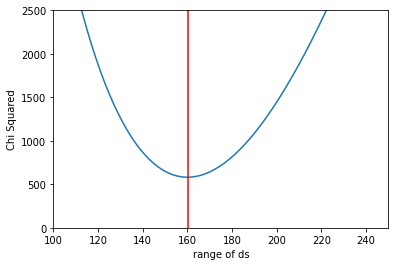

minimum chi squared value: 581.4808817880172
best ds for fit: 160.06402561024407


In [35]:
#Let's tackle a better fit for the hipparchos data
#To do this, let's write a for loop that will construct a new fit, Y, and calculate chi sq. for
#each iteration:

ds = np.linspace(0,2500,2500)

ChiSq = []
for ii in range(0,len(ds)):
    Y = np.sqrt(bins1)*np.exp((-1.0*bins1/ds[ii]))
    Normalized_Y = Y/(np.sum(Y)*binwidth)
    ChiSq.append(np.sum(((counts_one_hundred - Normalized_Y)/sigma)**2))

ChiSq = np.array(ChiSq)
ChiSq = ChiSq[~np.isnan(ChiSq)] #removing nan value from first element


ds = ds[0:-1] #to match dimensions as ChiSq 
#print len(ChiSq), len(ds)

plt.plot(ds,ChiSq)
plt.xlabel('range of ds')
plt.ylabel('Chi Squared')
plt.axvline(ds[np.argmin(ChiSq)],color='red')
plt.ylim(0,2500)
plt.xlim(100,250)
plt.show()

print ("minimum chi squared value:",np.min(ChiSq))
print ("best ds for fit:",ds[np.argmin(ChiSq)])

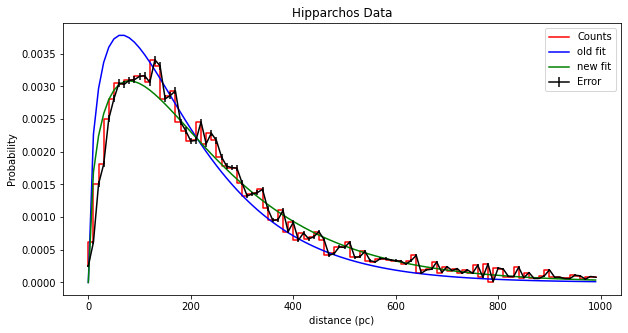

Reduced Chi Squared for Fit 1: 5.873544260485022


In [36]:
ds_min = ds[np.argmin(ChiSq)]
new_Y = np.sqrt(bins1)*np.exp((-1.0*bins1/ds_min))
norm_Y = new_Y/(np.sum(new_Y)*binwidth)
                              
#Try out ds_min in a plot:

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)    # The big subplot
ax.step(bins1, counts_one_hundred, color = 'red', label='Counts')
ax.plot(bins1, normalized_y, color = 'blue', label = 'old fit')
ax.plot(bins1,norm_Y, color = 'green', label = 'new fit')
ax.errorbar(bins1, counts_one_hundred, yerr=errorbars, color = 'black', label='Error' )
ax.legend(loc='best')
ax.set_xlabel('distance (pc)')
ax.set_ylabel('Probability')
ax.set_title('Hipparchos Data')
plt.show()

DOF = len(bins1) - 1 #1 parameter ds
Reduced_ChiSq = np.min(ChiSq)/ DOF; print( "Reduced Chi Squared for Fit 1:", Reduced_ChiSq)

In [37]:
#Let's change Y again to improve chi squared: Y = (x^p)* e^(-x/ds)

DS=np.linspace(1,250,500)
P =np.linspace(0,2,500); 
len(DS)

ChiSq2 = np.empty((DS.size,P.size)); 

#ChiSq2 = []
for ii in range(len(DS)):
    for jj in range(len(P)):
        Y2 = (bins1**(P[jj]))*np.exp((-1.0*bins1/(DS[ii])))
        Normalized_Y2 = Y2/(np.sum(Y2)*binwidth)
        ChiSq2[ii,jj] = (np.sum(((counts_one_hundred - Normalized_Y2)/sigma)**2))
        
print ("Minimum Chi Squared value for new model:", np.min(ChiSq2))

Minimum Chi Squared value for new model: 339.11057450514403


<ipython-input-38-f561400eee36>:4: RuntimeWarning: overflow encountered in power
  new_Y2 = (bins1**i)*np.exp((-1.0*bins1/j))
<ipython-input-38-f561400eee36>:5: RuntimeWarning: invalid value encountered in divide
  norm_Y2 = new_Y2/(np.sum(new_Y2)*binwidth)


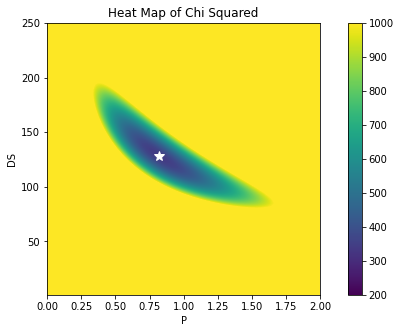

Minimum Chi Squared value for new model: 339.11057450514403
best DS value: 128.2444889779559
best P value: 0.8216432865731462


In [38]:
i,j = np.where(ChiSq2==np.min(ChiSq2))
#print i; print j

new_Y2 = (bins1**i)*np.exp((-1.0*bins1/j))
norm_Y2 = new_Y2/(np.sum(new_Y2)*binwidth)

#plt.pcolormesh(x, y, intensity)
#plt.colorbar() #need a colorbar to show the intensity scale
#plt.show()
DS_best =DS[i[0]]; P_best=P[j[0]]


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
im = ax.imshow(ChiSq2,extent=([P[0],P[-1],DS[0],DS[-1]]), aspect=0.008, vmin=200, vmax=1000, origin='lower')
fig.colorbar(im)
plt.plot(P_best,DS_best, markersize=10,color='white', marker='*')
plt.xlabel('P')
plt.ylabel('DS')
plt.title('Heat Map of Chi Squared')
plt.show()

print ("Minimum Chi Squared value for new model:", np.min(ChiSq2))
print ("best DS value:", DS_best); print( "best P value:", P_best)


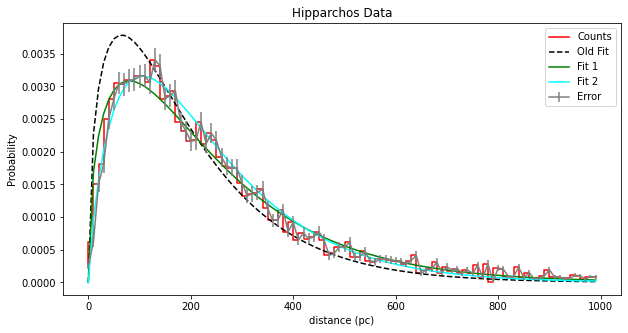

chi squared: 1314.2362692710612
p-value: 0.0
Reduced Chi Squared for Old Fit: 13.275113831020821
Reduced Chi Squared for Fit 1: 5.873544260485022
Reduced Chi squared for Fit 2: 3.4603119847463675


In [41]:
new_Y2 = (bins1**P_best)*np.exp((-1.0*bins1/DS_best))
norm_Y2 = new_Y2/(np.sum(new_Y2)*binwidth)


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)    # The big subplot
ax.step(bins1, counts_one_hundred, color = 'red', label='Counts')
ax.plot(bins1, normalized_y, color = 'black', label = 'Old Fit', linestyle='--')
ax.plot(bins1,norm_Y, color = 'green', label = 'Fit 1')
ax.plot(bins1,norm_Y2, color = 'cyan', label = 'Fit 2')
ax.errorbar(bins1, counts_one_hundred, yerr=sigma, color = 'grey', label='Error' )
ax.legend(loc='best')
ax.set_xlabel('distance (pc)')
ax.set_ylabel('Probability')
ax.set_title('Hipparchos Data')
#ax.set_axis_bgcolor('black') #color the background
plt.show()

DOF2 = len(bins1)-2 #2 parameters
dof = len(bins1)-0 #no parameters in old fit

chisq = np.sum(((counts_one_hundred - normalized_y)/sigma)**2) 
print ("chi squared:", chisq)
P_Value = 1 - stats.chi2.cdf(chisq,100)
print( "p-value:", P_Value )

Reduced_ChiSq0 =np.min(chisq)/ DOF; print ("Reduced Chi Squared for Old Fit:", Reduced_ChiSq0)
Reduced_ChiSq = np.min(ChiSq)/ DOF; print ("Reduced Chi Squared for Fit 1:", Reduced_ChiSq)
Reduced_ChiSq2 = np.min(ChiSq2) / DOF2 ; print( "Reduced Chi squared for Fit 2:", Reduced_ChiSq2)

[[0.06323709 0.08277125 0.28161399 0.20800438 0.16002775]
 [0.01769779 0.91484497 0.18525892 0.27677158 0.69948334]]
0.28897110689303496


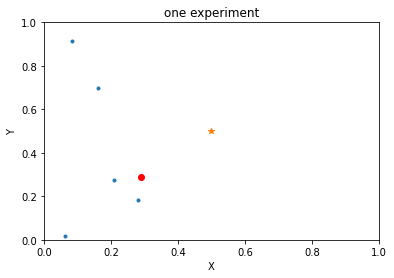

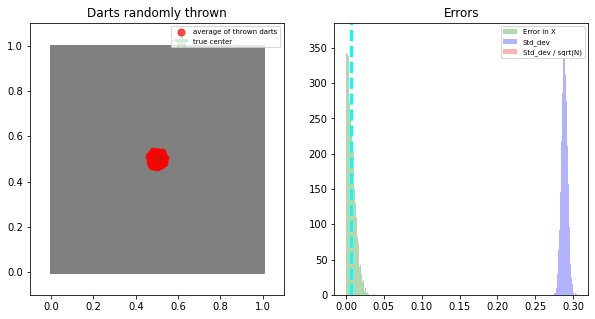

In [84]:
# Dart Throwing Example


#Create 5 random points
#one experiment
r = np.random.rand(2,5); print( r)
mean_r = np.mean(r); print (mean_r)



#Now do this a BUNCH of times (for loop it!)

number = 1000
iterations= 10000
MeanR1 = []; R1 = [];MeanR2 = []; R2 = [];STD_R1= [];STD_R2= []
for ii in range(0,iterations):
    Rand1 = np.random.rand(number)
    Rand2 = np.random.rand(number)
    R_avg1 = np.mean(Rand1)
    R_avg2 = np.mean(Rand2)
    MeanR1.append(R_avg1); #fills average random values to an array
    MeanR2.append(R_avg2);
    R1.append(Rand1)
    R2.append(Rand2)
    R_STD1 = np.std(Rand1,ddof=1) 
    R_STD2 = np.std(Rand2,ddof=1)
    STD_R1.append(R_STD1) #fills std_dev of random values to an array
    STD_R2.append(R_STD2)

R = [R1,R2]
STD_R = [STD_R1,STD_R2]



#Let's plot a histogram of the error
#error in x = mean-center
MeanR1= np.array(MeanR1)
MeanR2= np.array(MeanR2)

center = [np.linspace(0.5,0.5,iterations),np.linspace(0.5,0.5,iterations)]
MeanR = [MeanR1,MeanR2]
Error_X = np.abs(np.subtract(MeanR, center))


STD_over_N_R = np.divide(STD_R , np.sqrt(number))


plt.plot(r[0],r[1], marker='.', linestyle='none')
plt.plot(0.5,0.5,marker='*')
plt.plot(mean_r,mean_r,marker='o', color='red')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('one experiment')
plt.show()

Mean_of_Error_X = np.mean(Error_X[0])

fig = plt.figure(figsize=(10,5))

bx = fig.add_subplot(121)
bx.plot(R1,R2, marker='.', linestyle='none', color='grey',markersize=3,alpha=0.3)
bx.plot(MeanR1, MeanR2, marker='o', color='red',linestyle='none', markersize = 7,alpha=0.7, label='average of thrown darts' )
bx.plot(0.5,0.5,marker='*', markersize=15, color='green', alpha = 0.10, label='true center')
bx.set_xlim(-0.1,1.1)
bx.set_ylim(-0.1,1.1)
bx.set_title("Darts randomly thrown")
bx.legend(loc='upper right',fontsize = 'x-small')

ax = fig.add_subplot(122)    # The big subplot
ax.hist(Error_X[0], bins=100, label='Error in X', alpha=0.3, color='green')
ax.hist(STD_R[0], bins=100, label='Std_dev', alpha=0.3, color='blue')
ax.hist(STD_over_N_R[0], bins=100, label='Std_dev / sqrt(N)', alpha=0.3, color='red')
ax.axvline(x=Mean_of_Error_X, color='cyan', linewidth=3, linestyle='--')
ax.set_title("Errors")
ax.legend(loc='upper right',fontsize = 'x-small')

plt.show()

<ipython-input-33-c27abb8b7487>:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  binwidth_sample = np.float(dmax_sample-dmin_sample)/Nbins


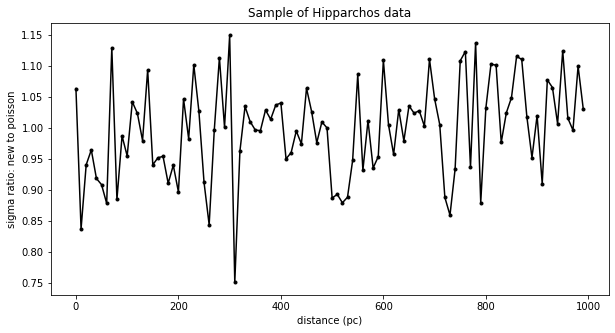

In [33]:
#------------------------------------Bootstrap sampling-----------------------------------------------------

# 1st decide how big sample of data will be, use np.random.choice(data, samplesize)

iterations = 100
samplesize = 10000
Nbins = len(bins1)

datalength = len(data)
bin_sample = np.linspace(0,1000,101)
bins = bin_sample[0:-1]
dmax_sample = np.max(bins); dmin_sample =np.min(bins)
binwidth_sample = float(dmax_sample-dmin_sample)/Nbins

sample = [] ; SCounts0 = np.empty((iterations,Nbins)); sample = np.empty((iterations,Nbins))
#sampling the data
for ii in range(0,Nbins):
    samp = np.random.choice(data,samplesize)
    sample_counts0 = np.histogram(samp, bin_sample)
    SCounts0[ii,:] = sample_counts0[0]/float(datalength)/binwidth_sample
    sample[ii,:] = sample_counts0[0]


new_sigma = np.std(SCounts0, axis=0) #error in sample

sigma_ratio = new_sigma/sigma #new error over original hipparcos error 

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)    # The big subplot
ax.plot(bins, sigma_ratio, color='black', marker = '.')
ax.set_title('Sample of Hipparchos data')
ax.set_xlabel('distance (pc)')
ax.set_ylabel('sigma ratio: new to poisson')
plt.show()

In [43]:
data = np.loadtxt('hipparchos_subsample.dat')
data_range = np.arange(0,9998)

bins0 = np.linspace(0,1000,101)
bins1 = bins0[0:-1] #100 bins from 0 to 1000

bins_tenthousand0 = np.linspace(0,1000, 10001)
bins_tenthousand = bins_tenthousand0[0:-1] #10,000 bins from 0 to 1000

counts0 = np.histogram(data, bins0)
datalength = len(data)*1.0 #100
counts = counts0[0]/datalength
dmax = np.max(bins1); dmin =np.min(bins1)
binwidth = float(dmax-dmin)/len(bins1)

dmax_tenthou = np.max(bins_tenthousand); dmin_tenthou =np.min(bins_tenthousand)
binwidth_tenthou = float(dmax_tenthou-dmin_tenthou)/len(bins_tenthousand)

N_tot = float(len(counts)) #10,000 stars
sigma = np.sqrt(counts)/N_tot/binwidth ; #sigma for 100 bins, 10,000 stars
dPddist = counts/N_tot/binwidth
counts0 = np.histogram(data, bins0)
datalength = len(data)*1.0
counts = counts0[0]/datalength
counts_one_hundred = counts/binwidth

y = np.sqrt(bins1)*np.exp((-1.0*bins1/150)) #first model for 100 bins
normalized_y = y/(np.sum(y)*binwidth)

y_tenthou =np.sqrt(bins_tenthousand)*np.exp((-1.0*bins_tenthousand/150)) #first model for 10,000 bins
normalized_y_tenthou = y_tenthou/(np.sum(y_tenthou)*binwidth_tenthou)


chisq = np.sum(((counts_one_hundred - normalized_y)/sigma)**2) ; print( "chi squared:", chisq)
P_Value = 1 - stats.chi2.cdf(chisq,100); print ("p-value:", P_Value )
#Input for stats.chi2.cdf(chisq , d.o.f.)




ds = np.linspace(0,2500,2500) # a range of values to test first model with

ChiSq = []
for ii in range(0,len(ds)):
    Y = np.sqrt(bins1)*np.exp((-1.0*bins1/ds[ii]))
    Normalized_Y = Y/(np.sum(Y)*binwidth)
    ChiSq.append(np.sum(((counts_one_hundred - Normalized_Y)/sigma)**2))

ChiSq = np.array(ChiSq) #An array of chi squared values created to see which is the smallest (aka the best)
ChiSq = ChiSq[~np.isnan(ChiSq)] #removing nan value from first element


ds = ds[0:-1]

ds_min = ds[np.argmin(ChiSq)]
new_Y = np.sqrt(bins1)*np.exp((-1.0*bins1/ds_min))
norm_Y = new_Y/(np.sum(new_Y)*binwidth)

#Let's try two parameters DS and P in a 2nd model

DS=np.linspace(1,250,500)
P =np.linspace(0,2,500); 
len(DS)

ChiSq2 = np.empty((DS.size,P.size))  #empty array with the dimensions of [DS,P]

#ChiSq2 = []
for ii in range(len(DS)):
    for jj in range(len(P)):
        Y2 = (bins1**(P[jj]))*np.exp((-1.0*bins1/(DS[ii])))
        Normalized_Y2 = Y2/(np.sum(Y2)*binwidth)
        ChiSq2[ii,jj] = (np.sum(((counts_one_hundred - Normalized_Y2)/sigma)**2)) #creating a range of chi squares to 
#                                                                                  test
        
i,j = np.where(ChiSq2==np.min(ChiSq2)) #indices where smallest (aka best) chi squared occurs
DS_best =DS[i[0]]; P_best=P[j[0]]

bins1_shift = bins1+0.5*binwidth #to avoid zeros in first bin, shift the bin by a half binwidth

new_Y2 = (bins1_shift**P_best)*np.exp((-1.0*bins1_shift/DS_best)) #redoing 2nd model
norm_Y2 = new_Y2/(np.sum(new_Y2)*binwidth)



DOF = len(bins1) - 1 #1 parameter ds
Reduced_ChiSq = np.min(ChiSq)/ DOF; print ("Reduced Chi Squared for Fit 1:", Reduced_ChiSq)
DOF2 = len(bins1)-2 #2 parameters
dof = len(bins1)-0 #no parameters in old fit
Reduced_ChiSq0 =np.min(chisq)/ DOF; print ("Reduced Chi Squared for Old Fit:", Reduced_ChiSq0)
Reduced_ChiSq = np.min(ChiSq)/ DOF; print ("Reduced Chi Squared for Fit 1:", Reduced_ChiSq)
Reduced_ChiSq2 = np.min(ChiSq2) / DOF2 ; print ("Reduced Chi squared for Fit 2:", Reduced_ChiSq2)


chi squared: 664.2701566285181
p-value: 0.0


<ipython-input-43-4706ec778247>:45: RuntimeWarning: divide by zero encountered in divide
  Y = np.sqrt(bins1)*np.exp((-1.0*bins1/ds[ii]))
<ipython-input-43-4706ec778247>:45: RuntimeWarning: invalid value encountered in divide
  Y = np.sqrt(bins1)*np.exp((-1.0*bins1/ds[ii]))


Reduced Chi Squared for Fit 1: 5.873544260485022
Reduced Chi Squared for Old Fit: 6.709799561904223
Reduced Chi Squared for Fit 1: 5.873544260485022
Reduced Chi squared for Fit 2: 3.4603119847463675


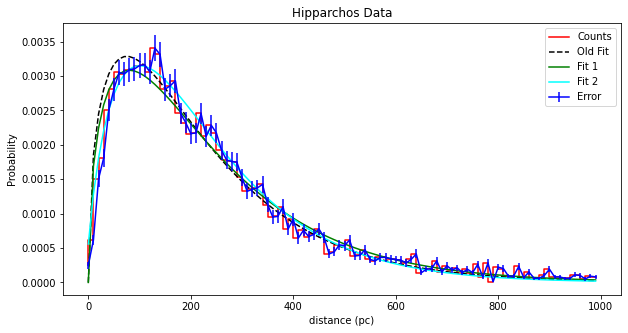

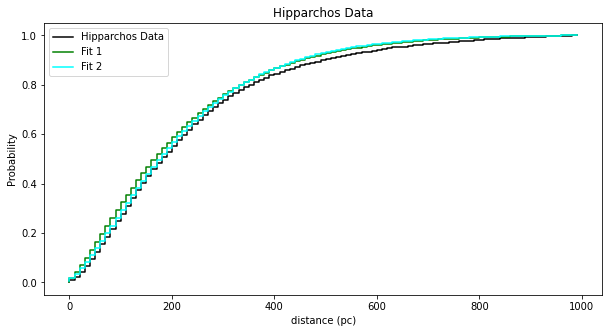

In [44]:
#-------------------------------------Making A Fake Hipparchos Data set-------------------------------------

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)    # The big subplot
ax.step(bins1, counts_one_hundred, color = 'red', label='Counts')
ax.plot(bins1, normalized_y, color = 'black', label = 'Old Fit', linestyle='--')
ax.plot(bins1,norm_Y, color = 'green', label = 'Fit 1')
ax.plot(bins1,norm_Y2, color = 'cyan', label = 'Fit 2')
ax.errorbar(bins1, counts_one_hundred, yerr=sigma, color = 'blue', label='Error' )
ax.legend(loc='best')
ax.set_xlabel('distance (pc)')
ax.set_ylabel('Probability')
ax.set_title('Hipparchos Data')
plt.show()


#Convert model (Y2) to cumuluative probability(np.cumsum(counts))
CumulSum = np.cumsum(counts)
CumulSum2 = np.cumsum(norm_Y2*binwidth)
CumulSum1 = np.cumsum(normalized_y*binwidth)
CumulSum_tentho = np.cumsum(normalized_y_tenthou*binwidth_tenthou)

#Cumulative Probabilities plot for original data, 1st and 2nd models
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)    # The big subplot
ax.step(bins1, CumulSum, color = 'black', label = 'Hipparchos Data', linewidth=1.5)
ax.step(bins1,CumulSum1, color = 'green', label = 'Fit 1')
ax.step(bins1,CumulSum2, color = 'cyan', label = 'Fit 2')
ax.legend(loc='best')
ax.set_xlabel('distance (pc)')
ax.set_ylabel('Probability')
ax.set_title('Hipparchos Data')
#ax.set_axis_bgcolor('black') #color the background
plt.show()



<ipython-input-45-e0fdd5d6df5b>:29: RuntimeWarning: invalid value encountered in divide
  sigma3 = fakecounts/np.sqrt(fake_counts0[0])


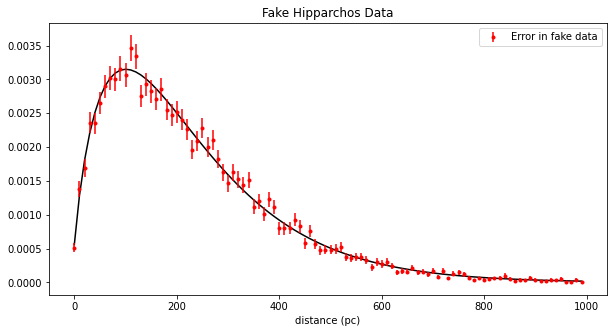

Chi Squared for fake data: 103.19417785319344
Reduced Chi Squared for fake data: 1.0319417785319345


In [45]:
fake_data = np.random.uniform(0,1,10000) #create random 10,000 points

bins_tenthousand = np.linspace(0,1000, 10000) #10,000 bins


bins_tenthousand_binwidth = (np.max(bins_tenthousand)-np.min(bins_tenthousand))/len(bins_tenthousand)
bins_tenthousand_center = bins_tenthousand+bins_tenthousand_binwidth #bins shifted by half a bin width

y_tenthou =(bins_tenthousand**P_best)*np.exp((-1.0*bins_tenthousand/DS_best))  # 2nd model with 10,000 bins
normalized_y_tenthou = y_tenthou/(np.sum(y_tenthou)*bins_tenthousand_binwidth) # used for more detailed results

CumulSum_tentho = np.cumsum(normalized_y_tenthou*bins_tenthousand_binwidth) #cumulative probability of 10,000 binned
#                                                                            2nd model

Pcum = CumulSum_tentho

dmodel = bins_tenthousand
drandom = dmodel[np.searchsorted(Pcum,fake_data)]
fake_counts0 = np.histogram(drandom,bins0)
fake_datalength = len(drandom)*1.0
fake_counts = fake_counts0[0]/fake_datalength

fake_binwidth = float(dmax-dmin)/len(bins1)

fakecounts = fake_counts/fake_binwidth

N_tot3 = float(len(drandom))

sigma3 = fakecounts/np.sqrt(fake_counts0[0])


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111) 
ax.plot(bins1,norm_Y2, color='black')
ax.errorbar(bins1, fakecounts, yerr=sigma3, color = 'red', label='Error in fake data', fmt='.' )
ax.set_title('Fake Hipparchos Data')
ax.set_xlabel('distance (pc)')
ax.legend(loc='upper right')
plt.show()


diff = (fakecounts-norm_Y2); #diff = diff[-1:]
ChiSq3 = np.nansum((diff/sigma3)**2)


print ("Chi Squared for fake data:", ChiSq3)
DOF3 = len(bins1) -0 #0 parameters?
print ("Reduced Chi Squared for fake data:", ChiSq3/DOF3)


In [46]:

#Let's make a heat map like earlier

ds_new=np.linspace(1,250,500)
p_new =np.linspace(0,2,500); 


ChiSq_new = np.empty((ds_new.size,p_new.size)); 


for ii in range(len(ds_new)):
    for jj in range(len(p_new)):
        y_new = (bins1**(p_new[jj]))*np.exp((-1.0*bins1/(ds_new[ii])))
        norm_y_new = y_new/(np.sum(y_new)*binwidth)
        ChiSq_new[ii,jj] = (np.sum(((fakecounts - norm_y_new)/sigma)**2))
        
print ("Minimum Chi Squared value for new model:", np.min(ChiSq_new))


Minimum Chi Squared value for new model: 195.76556486443786


<ipython-input-63-e5621d73cf3f>:4: RuntimeWarning: overflow encountered in power
  Y_NEW = (bins1**I)*np.exp((-1.0*bins1/J))
<ipython-input-63-e5621d73cf3f>:5: RuntimeWarning: invalid value encountered in divide
  NORM_Y_NEW = Y_NEW/(np.sum(Y_NEW)*binwidth)


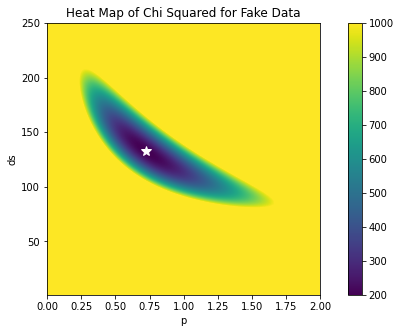

Minimum Chi Squared value for new model: 195.76556486443786
best DS value: 132.73547094188376
best P value: 0.7254509018036072


In [63]:
I,J = np.where(ChiSq_new==np.min(ChiSq_new))
#print i; print j

Y_NEW = (bins1**I)*np.exp((-1.0*bins1/J))
NORM_Y_NEW = Y_NEW/(np.sum(Y_NEW)*binwidth)

ds_best =ds_new[I[0]]; p_best=p_new[J[0]]


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
im = ax.imshow(ChiSq_new,extent=([p_new[0],p_new[-1],ds_new[0],ds_new[-1]]), aspect=0.008, vmin=200, vmax=1000, origin='lower')
fig.colorbar(im)
plt.plot(p_best,ds_best, markersize=10,color='white', marker='*')
plt.xlabel('p')
plt.ylabel('ds')
plt.title('Heat Map of Chi Squared for Fake Data')
plt.show()


print ("Minimum Chi Squared value for new model:", np.min(ChiSq_new))
print ("best DS value:", ds_best)
print ("best P value:", p_best)


In [48]:
#--------------------------------------MCMC Algorithm----------------------------------------------------------------------------
#Let's use a one chain algorithm (Metropolis Hastings)

Nchain = 10000 #length of chain
A = np.empty(Nchain)
DS_mcmc = np.empty(Nchain)
P_mcmc = np.empty(Nchain)
ChiSq_mcmc = np.empty(Nchain)

P_mcmc[0] = 0.5
DS_mcmc[0] = 150

def get_chi2( p, ds, Bins, normalizedcounts, histogrammed_data ):
    y = (Bins**p)*np.exp(-Bins/float(ds))
    d_max = np.max(Bins)
    d_min =np.min(Bins)
    bin_width = float(d_max-d_min)/len(Bins)
    norm_y= y/(np.sum(y)*bin_width)
    sigma = normalizedcounts/np.sqrt(histogrammed_data[0])
    chi2 = (np.nansum(((normalizedcounts - norm_y)/sigma)**2))

    return chi2
    

ChiSq_mcmc[0] = get_chi2( P_mcmc[0], DS_mcmc[0], bins1, fakecounts, fake_counts0)

for ii in range(1,Nchain):
    P_step = np.random.normal(loc=0,scale=0.1) #arguments (mean, sigma)
    DS_step= np.random.normal(loc=0,scale=10)

    DS_try = DS_mcmc[ii-1] + DS_step
    P_try = P_mcmc[ii-1] + P_step
    ChiSq_try = get_chi2(P_try, DS_try, bins1, fakecounts, fake_counts0)
    if ChiSq_try < ChiSq_mcmc[ii-1]:
        DS_mcmc[ii] = DS_try
        P_mcmc[ii] = P_try
        ChiSq_mcmc[ii] = ChiSq_try 
    else:
        R = np.random.uniform(0,1)
        if R < (np.exp((ChiSq_mcmc[ii-1]**2-ChiSq_try**2)/2.0)):
            DS_mcmc[ii] = DS_try
            P_mcmc[ii] = P_try
            ChiSq_mcmc[ii] = ChiSq_try 
        else:
            DS_mcmc[ii] = DS_mcmc[ii-1]
            P_mcmc[ii] = P_mcmc[ii-1]
            ChiSq_mcmc[ii] = ChiSq_mcmc[ii-1]


<ipython-input-48-98d71f9e0d5a>:19: RuntimeWarning: invalid value encountered in divide
  sigma = normalizedcounts/np.sqrt(histogrammed_data[0])


Chisq_mcmc: [299.33367486 299.33367486 299.33367486 ... 159.90656285 159.90656285
 159.90656285]
Chisq_mcmc minimum: 159.90656285142597

Average of P_mcmc: 0.7693227351542381
best fit P: 0.8216432865731462

Average of DS_mcmc: 128.34504666261742
best fit DS: 128.2444889779559


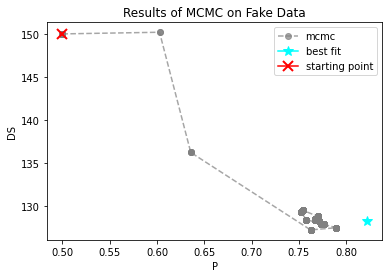

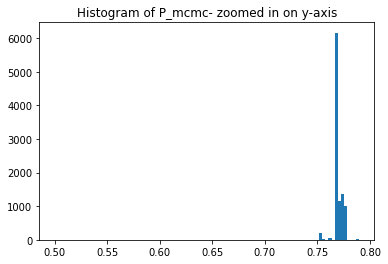

In [64]:
print ("Chisq_mcmc:", ChiSq_mcmc    )

print ("Chisq_mcmc minimum:", np.min(ChiSq_mcmc))
print("")
print ("Average of P_mcmc:", np.mean(P_mcmc))
print ("best fit P:", P_best)
print("")
print ("Average of DS_mcmc:", np.mean(DS_mcmc))
print ("best fit DS:", DS_best)

plt.plot(P_mcmc,DS_mcmc, marker='o', linestyle='--', label='mcmc',alpha=0.7, color='grey' )
plt.plot(P_best,DS_best, marker = "*", color='cyan', markersize=10, label='best fit')
plt.plot(0.5,150,marker = "x", color='red',linestyle='-' ,markersize=10, label='starting point', mew=2)
#plt.plot(P_mcmc[-1],DS_mcmc[-1], marker ="+", color='pink', markersize=10, label='ending point', mew=2)
plt.xlabel('P')
plt.ylabel('DS')
plt.title('Results of MCMC on Fake Data')
plt.legend(loc='best')
# plt.xlim(0.7,0.9)
# plt.ylim(120,140)
plt.show()

#P_chain = np.sort(P_mcmc); DS_chain = np.sort(DS_mcmc)
plt.hist(P_mcmc,bins=100)
#plt.ylim(0,70)
plt.title('Histogram of P_mcmc- zoomed in on y-axis')
plt.show()

#^^^^^^ THIS ISN"T QUITE RIGHT. SOMETHING IS SORT OF WRONG HERE.

# Let's plot our final fit from our basic MCMC analysis:

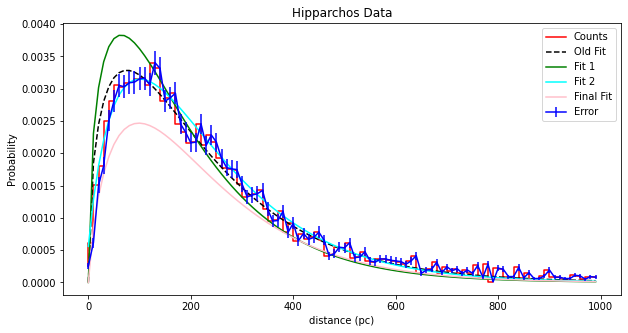

In [82]:
ds_mean = DS_mcmc[np.argmin(ChiSq_mcmc)]
p_mean = P_mcmc[np.argmin(ChiSq_mcmc)]

new_Y3 = (bins1**p_mean)*np.exp((-bins1/ds_mean)) #redoing 2nd model
norm_Y3 = new_Y3/(np.sum(new_Y2)*binwidth)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)    # The big subplot
ax.step(bins1, counts_one_hundred, color = 'red', label='Counts')
ax.plot(bins1, normalized_y, color = 'black', label = 'Old Fit', linestyle='--')
ax.plot(bins1,norm_Y, color = 'green', label = 'Fit 1')
ax.plot(bins1,norm_Y2, color = 'cyan', label = 'Fit 2')
ax.plot(bins1,norm_Y3, color = 'pink', label = 'Final Fit')
ax.errorbar(bins1, counts_one_hundred, yerr=sigma, color = 'blue', label='Error' )
ax.legend(loc='best')
ax.set_xlabel('distance (pc)')
ax.set_ylabel('Probability')
ax.set_title('Hipparchos Data')
#ax.set_axis_bgcolor('black') #color the background
plt.show()

# In the end, our basic MCMC analysis produced a WORSE fit than our for loop chi-square minimization approach. Ideally, with MCMC, you would do tens or hundreds of thousands od chains. Our basic approach, will inefficiently sample our data. There are far better tools for this kind of analysis. 

## See [https://emcee.readthedocs.io/en/stable/](emcee) and [https://docs.pymc.io/en/v3/index.html](PyMC3) for more tutorials and advanced usage. 




In [83]:
print('Best-fit results for our chi-square minimization for loop:')
print ("Minimum Chi Squared value for new model:", np.min(ChiSq_new))
print ("best DS value:", ds_best)
print ("best P value:", p_best)
print('')

print('Best-fit results from our MCMC analysis:')
print ("Minimum Chi Squared value for new model:", np.min(ChiSq_mcmc))
print ("best DS value:", ds_mean)
print ("best P value:", p_mean)

Best-fit results for our chi-square minimization for loop:
Minimum Chi Squared value for new model: 195.76556486443786
best DS value: 132.73547094188376
best P value: 0.7254509018036072

Best-fit results from our MCMC analysis:
Minimum Chi Squared value for new model: 159.90656285142597
best DS value: 128.45410881841627
best P value: 0.7684746997765062
